In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
from dotenv import load_dotenv
load_dotenv()
import h5py
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from midasmednet.utils.plots import vis_logimages, vis_loglabels, vis_logheatmaps

In [62]:
DATA=Path(os.getenv('DATA'))

In [63]:
h5_path = Path(DATA)/"interim/mra_train.h5"
with h5py.File(h5_path, 'r') as hf:
    keys = list(hf['images'])
    key = keys[0]
    img = hf[f'images/{key}'][:].astype(np.float32)
    mask = hf[f'labels/{key}'][:].astype(np.uint8)
    hmap = hf[f'heatmaps/{key}'][:].astype(np.float32)

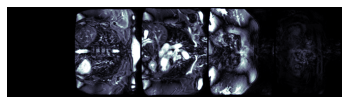

In [64]:
fig, ax = vis_logimages(img, steps=5)

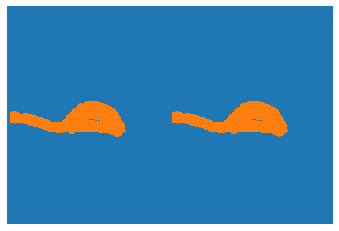

In [65]:
fig, ax = vis_loglabels(mask[0, ...], pred_class=mask[0, ...])

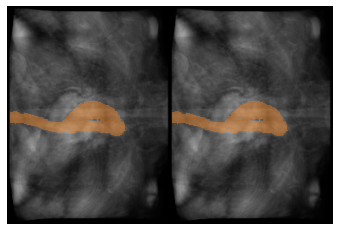

In [66]:
fig, ax = vis_loglabels(labels=mask[0, ...],
                        pred_class=mask[0, ...],
                        alpha=0.4,
                        inputs=img[0, ...], projection_type='mean')

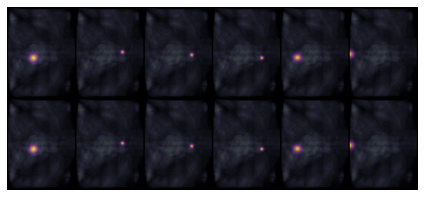

In [75]:
fig, ax = vis_logheatmaps(img[0, ...], hmap, hmap, mip_axis=1)